### 2-2 Boston House Prices (Ridge regression)

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def loss_fn(X, Y, beta):
    return cp.pnorm(X @ beta - Y, p=2)**2

def regularizer(beta):
    return cp.pnorm(beta, p=2)**2

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value

In [3]:
boston = pd.read_csv('boston.csv')

In [4]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
n = 13
X_train = boston.iloc[:100, :-1].values
Y_train = boston.iloc[:100,-1].values
X_test = boston.iloc[100:200,:-1].values
Y_test = boston.iloc[100:200,-1].values

In [6]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((100, 13), (100,), (100, 13), (100,))

In [7]:
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, beta, lambd)))

In [8]:
lambd_values = np.logspace(-2, 3, 100)
train_errors = []
test_errors = []
beta_values = []

for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, Y_train, beta))
    test_errors.append(mse(X_test, Y_test, beta))
    beta_values.append(beta.value)

/home/seungsu/anaconda3/envs/cvxpy/lib/python3.11/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


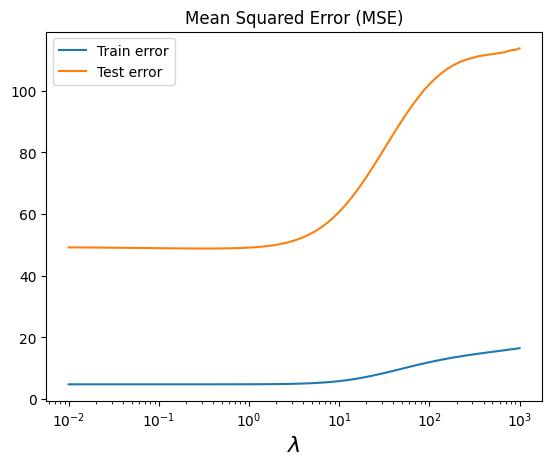

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

plot_train_test_errors(train_errors, test_errors, lambd_values)

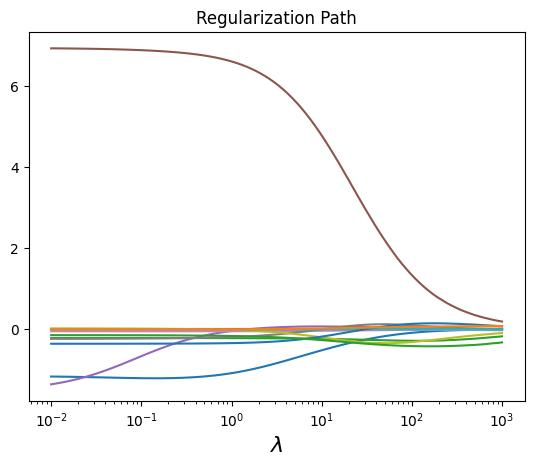

In [10]:
def plot_regularization_path(lambd_values, beta_values):
    num_coeffs = len(beta_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, beta_values)

### 2-2 Bike lentals forecasting (Lasso Regression)

In [11]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def loss_fn(X, Y, beta):
    return cp.norm2(X @ beta - Y)**2

def regularizer(beta):
    return cp.norm1(beta)

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value

In [13]:
bike_train = pd.read_csv('bike_train.csv')

In [14]:
bike_train = bike_train.iloc[:,1:]

In [15]:
bike_train

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [16]:
n = 3
X_train = bike_train.iloc[:30, :3].values
Y_train = bike_train.iloc[:30,-1].values
X_test = bike_train.iloc[30:60,:3].values
Y_test = bike_train.iloc[30:60,-1].values

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_trX_testain = scaler.transform(X_test)

In [18]:
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, beta, lambd)))

In [19]:
lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors = []
beta_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, Y_train, beta))
    test_errors.append(mse(X_test, Y_test, beta))
    beta_values.append(beta.value)

/home/seungsu/anaconda3/envs/cvxpy/lib/python3.11/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


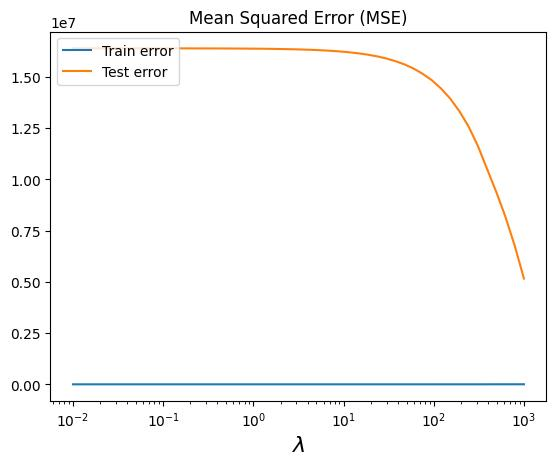

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

plot_train_test_errors(train_errors, test_errors, lambd_values)

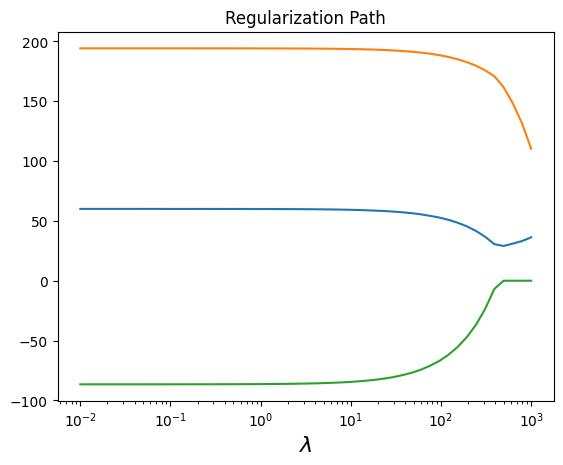

In [21]:
def plot_regularization_path(lambd_values, beta_values):
    num_coeffs = len(beta_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, beta_values)

### 2-2 Injection Molding AI dataset (SVM classifier)

In [22]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
label_data = pd.read_csv('all_data.csv')


In [24]:
label_data

,Unnamed: 0,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0,0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
1,1,0,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
2,2,0,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,...,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
3,3,0,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,...,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.600000
4,4,0,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,...,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,6731,0,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,...,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
6732,6732,0,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,...,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
6733,6733,0,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
6734,6734,0,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


In [25]:
Fail_data = label_data[label_data['PassOrFail'] == 1]
True_data = label_data[label_data['PassOrFail'] == 0]

In [26]:
True_data

,Unnamed: 0,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0,0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
1,1,0,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
2,2,0,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,...,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
3,3,0,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,...,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.600000
4,4,0,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,...,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,6731,0,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,...,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
6732,6732,0,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,...,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
6733,6733,0,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
6734,6734,0,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


In [27]:
del label_data['Unnamed: 0']

In [28]:
label_data = label_data.replace({'PassOrFail' : 0}, -1)

In [29]:
label_data.columns

Index(['PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [30]:
num = 1500
n = label_data.shape[1]-1
X_train = label_data.iloc[:num, 1:20].values
Y_train = label_data.iloc[:num,0:1].values
X_test = label_data.iloc[num:num*2 , 1:20].values
Y_test = label_data.iloc[num:num*2 , 0:1].values
n = 19

In [31]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1500, 19), (1500, 1), (1500, 19), (1500, 1))

In [33]:
beta_true = np.random.randn(n,1)


In [34]:
# Form SVM with L1 regularization problem.
import cvxpy as cp
beta = cp.Variable((n,1))
v = cp.Variable()
loss = cp.sum(cp.pos(1 - cp.multiply(Y_train, X_train @ beta - v)))
reg = cp.norm(beta, 1)
lambd = cp.Parameter(nonneg=True)
prob = cp.Problem(cp.Minimize(loss/X_test.shape[0] + lambd*reg))
offset = 0

In [35]:
beta_true.shape

(19, 1)

In [36]:
# Compute a trade-off curve and record train and test error.
TRIALS = 100
train_error = np.zeros(TRIALS)
test_error = np.zeros(TRIALS)
lambda_vals = np.logspace(-2, 0, TRIALS)
beta_vals = []
for i in range(TRIALS):
    lambd.value = lambda_vals[i]
    prob.solve()
    train_error[i] = (np.sign(X_train.dot(beta_true) + offset) != np.sign(X_train.dot(beta.value) - v.value)).sum()/ X_train.shape[0]
    test_error[i] = (np.sign(X_test.dot(beta_true) + offset) != np.sign(X_test.dot(beta.value) - v.value)).sum()/ X_test.shape[0]
    beta_vals.append(beta.value)

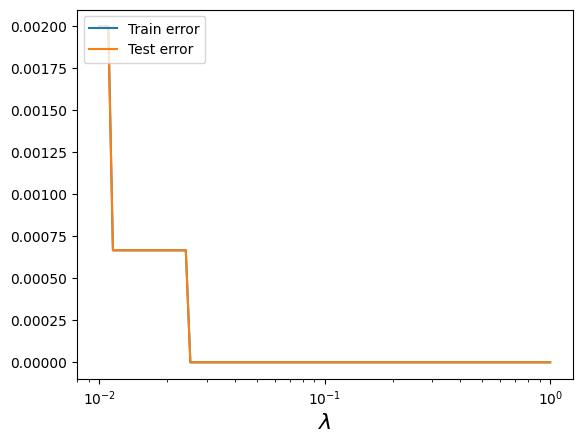

In [37]:
# Plot the train and test error over the trade-off curve.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

plt.plot(lambda_vals, train_error, label="Train error")
plt.plot(lambda_vals, test_error, label="Test error")
plt.xscale('log')
plt.legend(loc='upper left')
plt.xlabel(r"$\lambda$", fontsize=16)
plt.show()

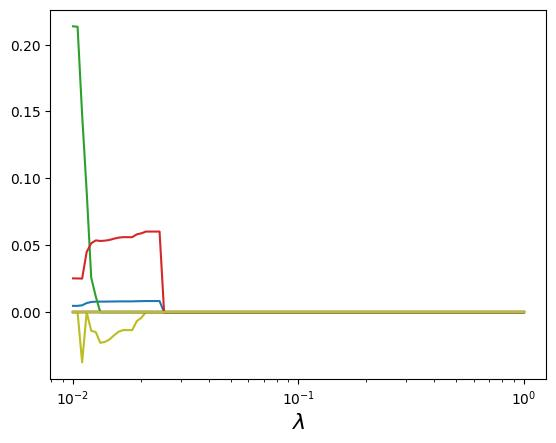

In [38]:
# Plot the regularization path for beta.
for i in range(n):
    plt.plot(lambda_vals, [wi[i,0] for wi in beta_vals])
plt.xlabel(r"$\lambda$", fontsize=16)
plt.xscale("log")

### 2-3 McDonald Diet(Linear program)

In [52]:
food = ['hamburger', 'Cheeseburger', 'McChicken', 'Big Mac', 'Bulgogi Burger']
nutrients = ['Sugar', 'Proteins', 'Fat']

amount_of_nutrients_per_food = np.array([
                                         [6, 7, 6, 8, 13],
                                         [13, 15, 15, 26, 16],
                                         [5, 7, 5, 12, 2],
                                         ])

cost_cal = np.array([248, 297, 374, 505, 399])


minimum = np.array([0, 40, 0])
maximum = np.array([24, 120, 15])

In [53]:
n = 5

In [54]:
x = cp.Variable(n, integer=True)
prob = cp.Problem(cp.Minimize(cost_cal@x),
                 [amount_of_nutrients_per_food @ x <= maximum,
                  amount_of_nutrients_per_food @ x >= minimum,
                  x>= 0])
prob.solve()


870.0

In [55]:
x.value

array([ 2., -0.,  1., -0., -0.])

### 2-3 WHO statistics on regression (Least-squares)

In [56]:
# Import packages.
import cvxpy as cp
import numpy as np

In [57]:
life_data = pd.read_csv('Life Expectancy Data.csv')
life_data.shape


(2938, 22)

In [58]:
life_data = life_data[life_data['Status'] == 'Developed']
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [59]:
life_data = life_data.iloc[:,3:]
life_data

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,82.8,59.0,1,NaN,0.00000,93.0,74,66.6,1,93.0,NaN,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
113,82.7,6.0,1,9.71,10769.36305,91.0,340,66.1,1,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,82.5,61.0,1,9.87,11734.85381,91.0,158,65.5,1,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,82.3,61.0,1,10.03,11714.99858,91.0,199,65.0,1,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,82.0,63.0,1,10.30,10986.26527,92.0,190,64.4,1,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,77.5,111.0,28,8.48,0.00000,92.0,37,63.1,33,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,77.2,114.0,28,8.40,0.00000,92.0,56,62.4,33,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,77.0,115.0,28,8.33,0.00000,88.0,41,61.7,33,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,76.9,115.0,28,8.25,0.00000,89.0,116,6.9,33,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


In [60]:
m = 100
life_data = life_data.fillna(0)
A = life_data.iloc[:m, 1:].values
b = life_data.iloc[:m, 0].values

X_test = life_data.iloc[m:m+1, 1:].values
Y_test = life_data.iloc[m:m+1, 0].values
n = A.shape[1]


In [61]:
# Define and solve the CVXPY problem.
x = cp.Variable(n)
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

387.37896704752717

In [62]:
life_data.iloc[m:m+1, 1:]

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
693,97.0,0,12.43,0.0,99.0,17,64.0,0,99.0,7.5,99.0,0.1,0.0,0.0,1.9,1.9,0.0,0.0


In [63]:
# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", cp.norm(A @ x - b, p=2).value)


The optimal value is 387.37896704752717
The optimal x is
[-6.58747831e-03 -3.49004829e+00 -1.10749776e-01  5.04052850e-04
  1.67782961e-02  1.58797910e-05  1.06859045e-03 -1.68488783e-01
  1.95551847e-01 -1.50328155e-01 -1.93659615e-01  8.23657728e+02
 -3.30880579e-05  2.46499209e-08 -1.20073512e+01  9.21820232e+00
 -1.57438473e+01  9.43606005e-01]
The norm of the residual is  19.681945204870562


In [64]:
(X_test @ x).value

array([75.84036576])

In [65]:
Y_test

array([77.8])

### 2-4 Heart disease (Logistics regression)

In [66]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [67]:
heart_disease = pd.read_csv('heart_disease.csv')
heart_disease = heart_disease.fillna(0)

In [68]:
m = 100

In [83]:
X = heart_disease.iloc[:m, :-1].values
Y = heart_disease.iloc[:m, -1].values
X_test = heart_disease.iloc[m:m+m, :-1].values
Y_test = heart_disease.iloc[m:m+m, -1].values

In [84]:
n = 15


In [85]:
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
log_likelihood = cp.sum(
    cp.multiply(Y, X @ beta) - cp.logistic(X @ beta)
)
problem = cp.Problem(cp.Maximize(log_likelihood/m - lambd * cp.norm(beta, 1)))

In [86]:
def error(scores, labels):
  scores[scores > 0] = 1
  scores[scores <= 0] = 0
  return np.sum(np.abs(scores - labels)) / float(np.size(labels))

In [87]:
trials = 100
train_error = np.zeros(trials)
test_error = np.zeros(trials)
lambda_vals = np.logspace(-2, 0, trials)
beta_vals = []
for i in range(trials):
    lambd.value = lambda_vals[i]
    problem.solve()
    train_error[i] = error( (X @ beta).value, Y)
    test_error[i] = error( (X_test @ beta).value, Y_test)
    beta_vals.append(beta.value)

In [88]:
problem.solve()

-0.4892266407214909

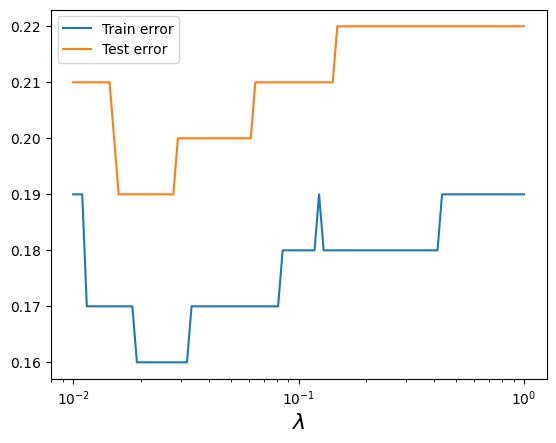

In [89]:
%matplotlib inline
%config InlineBackend.figure_format = "jpg"

plt.plot(lambda_vals, train_error, label="Train error")
plt.plot(lambda_vals, test_error, label="Test error")
plt.xscale("log")
plt.legend(loc="upper left")
plt.xlabel(r"$\lambda$", fontsize=16)
plt.show()

In [98]:
test_error

array([0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.2 , 0.19,
       0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19,
       0.19, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.21, 0.21, 0.21, 0.21,
       0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21,
       0.21, 0.21, 0.21, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22])

In [97]:
beta_vals[15].shape

[array([-2.09049999e-01,  6.25597485e-02,  3.65984924e-01, -2.03920534e-11,
         8.83875087e-03,  1.43427758e-10, -7.03375518e-26,  5.81044953e-01,
        -4.78100703e-12, -9.13155564e-03, -1.12850517e-02,  4.53290862e-02,
        -1.33162273e-01, -3.42500600e-02,  3.33694839e-03]),
 array([-1.90291162e-01,  6.20142250e-02,  3.59577034e-01, -1.79761155e-11,
         8.80304381e-03,  1.01618678e-10,  3.73813314e-26,  5.47805833e-01,
        -4.03981134e-12, -9.12028589e-03, -1.07099252e-02,  4.50346477e-02,
        -1.32763972e-01, -3.44783388e-02,  3.31483168e-03]),
 array([-1.70781469e-01,  6.14489008e-02,  3.52932226e-01, -1.94365438e-11,
         8.76984776e-03,  9.49416517e-11,  1.89174766e-26,  5.13159692e-01,
        -4.15965421e-12, -9.10931019e-03, -1.01092516e-02,  4.47282091e-02,
        -1.32356310e-01, -3.47192893e-02,  3.29208458e-03]),
 array([-1.50492071e-01,  6.08632859e-02,  3.46043538e-01, -2.32172503e-11,
         8.73959172e-03,  9.88016250e-11, -6.20270707e-27

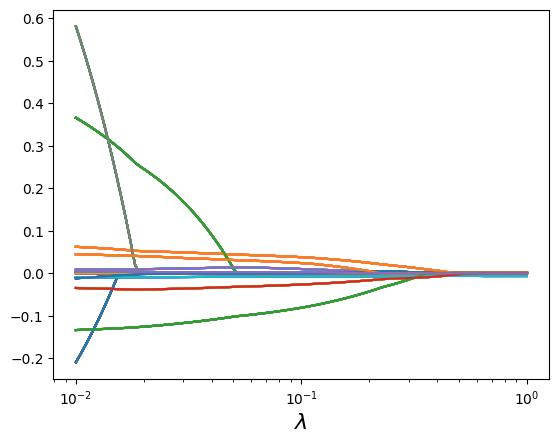

In [80]:
for i in range(n):
    plt.plot(lambda_vals, [wi for wi in beta_vals])
plt.xlabel(r"$\lambda$", fontsize=16)
plt.xscale("log")

In [81]:
beta_vals[0].shape

(15,)

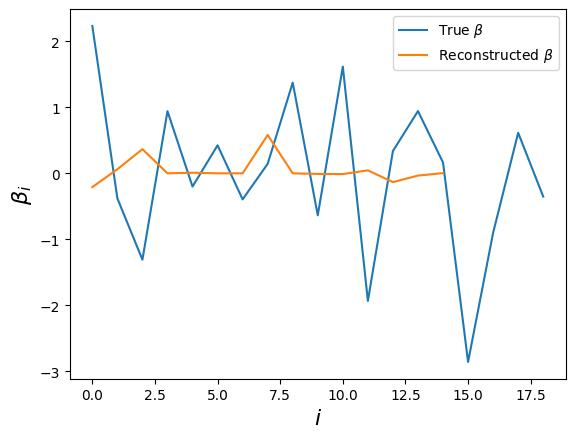

In [82]:
idx = np.argmin(test_error)
plt.plot(beta_true, label=r"True $\beta$")
plt.plot(beta_vals[idx], label=r"Reconstructed $\beta$")
plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$\beta_i$", fontsize=16)
plt.legend(loc="upper right")

In [96]:
new_X_test = heart_disease.iloc[m+m:m+m+5, :-1].values
new_Y_test = heart_disease.iloc[m+m:m+m+5, -1].values
print(heart_disease.iloc[m+m:m+m+5, :-1]) 
print(heart_disease.iloc[m+m:m+m+5, -1])



     male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
200     0   38        2.0              0         0.0     0.0                0   
201     1   53        4.0              1        30.0     0.0                0   
202     1   52        2.0              1        15.0     0.0                0   
203     1   41        1.0              1        40.0     0.0                0   
204     0   37        4.0              1        20.0     0.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
200             0         0    171.0  111.0   68.0  18.76       90.0     83.0  
201             0         0    189.0  110.0   67.5  23.59       60.0     63.0  
202             0         0    240.0   94.0   66.5  22.93       70.0     88.0  
203             0         0    239.0  119.5   70.0  29.79       70.0      0.0  
204             0         0    186.0  135.0   91.0  21.48       66.0     84.0  
200    0
201    0
202    0
203   

In [94]:
new_X_test @ beta_vals[15] > 0, new_Y_test>0

(array([False, False, False, False,  True]),
 array([False, False, False, False, False]))